<a href="https://colab.research.google.com/github/Rhino-byte/Time-Series-/blob/main/Cryptocurrency_In_R_rmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this Research we will be building GARCH models to help us analyse

In [ ]:
# Install neccesarry package
install.packages("zoo")
install.packages("xts")
install.packages("tidyverse")
install.packages("httr")
install.packages("jsonlite")
install.packages('quantmod')

library(xts)
library(zoo)
library(tidyverse)
library(httr)
library(jsonlite)
library(quantmod)

In [ ]:
#  private key
api_key<-'TS7dqZAFi9QPHa3FQSW/YGvCBG+gGMMzZrhcqysq1bjKe0WoaOs4sm2rgr37RHZ+eI/iyxuu570DYcztPHO6uA=='
# API_key
api_secret<-'99VP7jA7/qu1DEIOl+4FxvR+nTpZh9QfSgx8vXL8FPM7tRMatQSzjfRL'

In [ ]:
load_api_keys <- function () {
api_key <- Sys.getenv (" KRAKEN_API_KEY ")
api_secret <- Sys.getenv (" KRAKEN_API_SECRET ")
return ( list ( key = api_key , secret = api_secret ) )
}

initialize_kraken_api <- function () {
keys <- load_api_keys ()
list (
key = api_key,
secret = api_secret
}

In [ ]:
get_ohlc_data <- function(pair = "XXBTZUSD", interval = 1440) {
  # Initialize Kraken API
  api <- initialize_kraken_api()

  # Kraken API endpoint
  url <- "https://api.kraken.com/0/public/OHLC"

  # Parameters for the request
  params <- list(
    pair = pair,
    interval = interval
  )

  # Make the GET request
  response <- GET(url, query = params)
  # Check the status code
  if (status_code(response) != 200) {
    stop("Failed to fetch data from Kraken API. Status code: ", status_code(response))
  }

  # Parse the response
  content <- fromJSON(content(response, "text"), flatten = TRUE)

  # Extract OHLC data
  ohlc_data <- content$result[[pair]]

  if (is.null(ohlc_data)) {
    stop("No data found for the given pair.")
  }

  # Convert to data frame
  ohlc_df <- as.data.frame(ohlc_data)
  colnames(ohlc_df) <- c("time", "open", "high", "low", "close", "vwap", "volume", "count")

  # Convert time from UNIX timestamp to readable date
  ohlc_df$time <- as.POSIXct(as.integer(ohlc_df$time))

  return(ohlc_df)
}

In [ ]:
BTC_data = get_ohlc_data()

No encoding supplied: defaulting to UTF-8.



In [ ]:
# Convert all variables to numerical
BTC_data %>% mutate_if(is.character,as.numeric)->BTC_data

In [ ]:
head(BTC_data)

,time,open,high,low,close,vwap,volume,count
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-10-29,20600.7,21074.4,20565.4,20813.6,20822.4,2053.926,14753
2,2022-10-30,20813.8,20925.0,20525.0,20625.0,20715.0,1600.232,11331
3,2022-10-31,20625.0,20823.0,20250.1,20499.7,20521.9,3143.698,17212
4,2022-11-01,20498.0,20677.0,20339.4,20486.5,20487.4,1738.253,14313
5,2022-11-02,20486.4,20864.3,20059.8,20153.5,20435.9,3924.504,22281
6,2022-11-03,20153.5,20383.0,20050.0,20209.1,20236.9,2864.190,17485


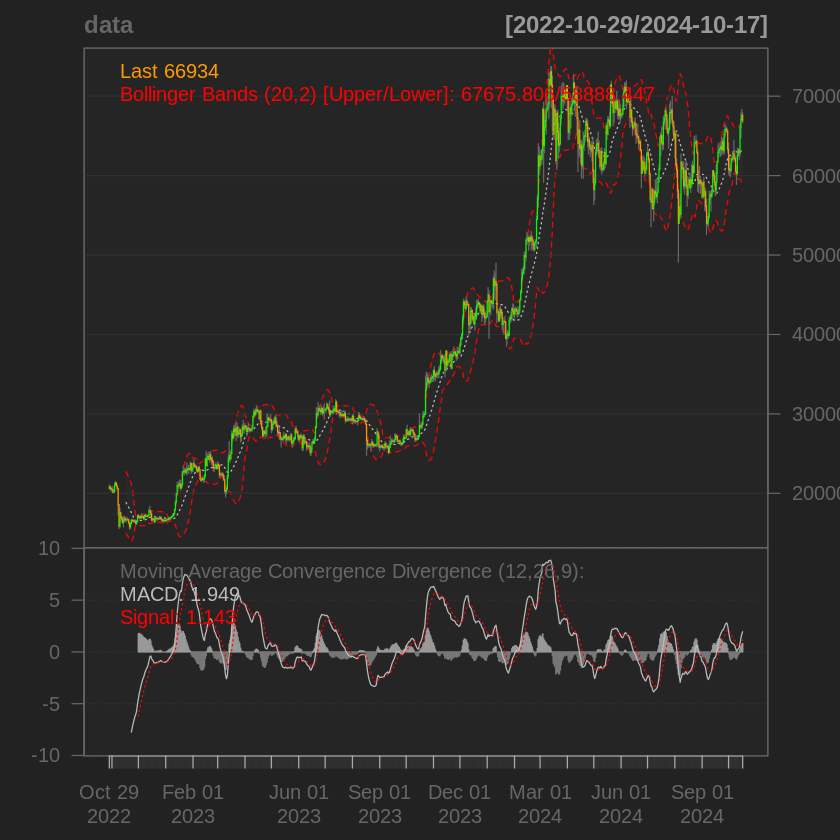

In [ ]:
# plot the data
plot_series_chart<- function(data){
chartSeries(
  x = data,
  TA = c(
    quantmod::addMACD(),
    quantmod::addBBands()
  ))
}
plot_series_chart(BTC_data)

In [94]:
names(BTC_data)

[1] "time"   "open"   "high"   "low"    "close"  "vwap"   "volume" "count"

In [ ]:
safe_model_fit <- function(fit_function, model_name) {
    tryCatch({
      model <- fit_function()
      forecast <- forecast::forecast(model, h = length(test_data))$mean
      ic <- AIC(model)
      model_smape <- smape(test_data, forecast)
      list(Order = list(arimaorder(model)), Error = FALSE, IC = ic, SMAPE = model_smape)
    }, error = function(e) {
      # If the model fails, return NA and mark as error
      list(Order = list(NA), Error = TRUE, IC = NA, SMAPE = NA)
    })
  }